In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Mendownload dan menyiapkan dataset 
! kaggle datasets download fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 40.0MB/s]


In [6]:
# Mengekstrak zip file
import zipfile

local_zip = '/content/stroke-prediction-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import pandas as pd

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [8]:
df.shape

(5110, 12)

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df = df.drop('id', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [14]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
df.describe(exclude='number')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [17]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
df = df[df['gender']!='Other']

In [19]:
df = df.drop(['hypertension', 'heart_disease'], axis=1)

In [20]:
df.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Numerical

##Univariate

**age**

In [21]:
df = df[df['age']>1]

In [22]:
import seaborn as sns

df['age'].describe()

count    5061.000000
mean       43.634610
std        22.333711
min         1.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

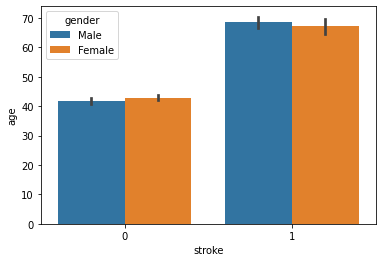

In [23]:
sns.barplot(data=df, x='stroke', y='age', hue='gender')

**avg_glucose_level**

In [24]:
df['avg_glucose_level'].describe()

count    5061.000000
mean      106.220968
std        45.397072
min        55.120000
25%        77.260000
50%        91.890000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

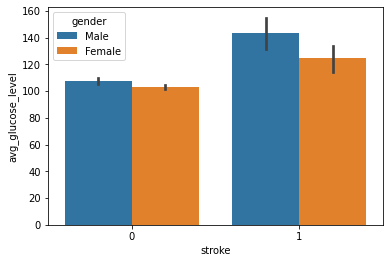

In [25]:
sns.barplot(data=df, x='stroke', y='avg_glucose_level', hue='gender')

**bmi**

In [26]:
df['bmi'].describe()

count    5061.000000
mean       28.992323
std         7.659299
min        10.300000
25%        23.900000
50%        28.500000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

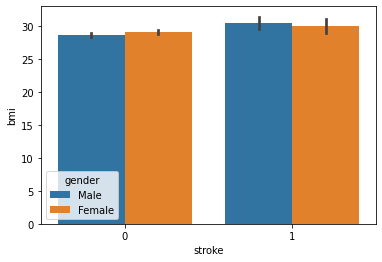

In [27]:
sns.barplot(data=df, x='stroke', y='bmi', hue='gender')

**stroke**

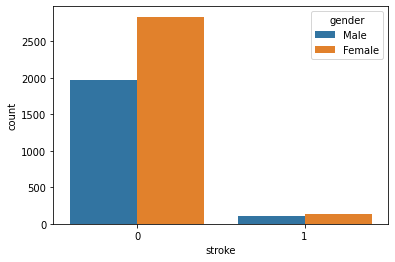

In [28]:
sns.countplot(data=df, x='stroke', hue='gender')

In [29]:
df['stroke'].value_counts()

0    4812
1     249
Name: stroke, dtype: int64

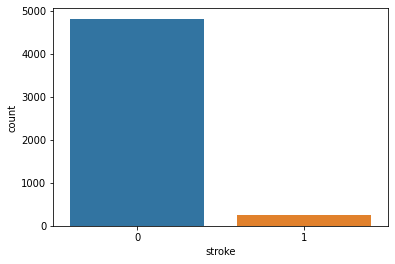

In [30]:
sns.countplot(data=df, x='stroke')

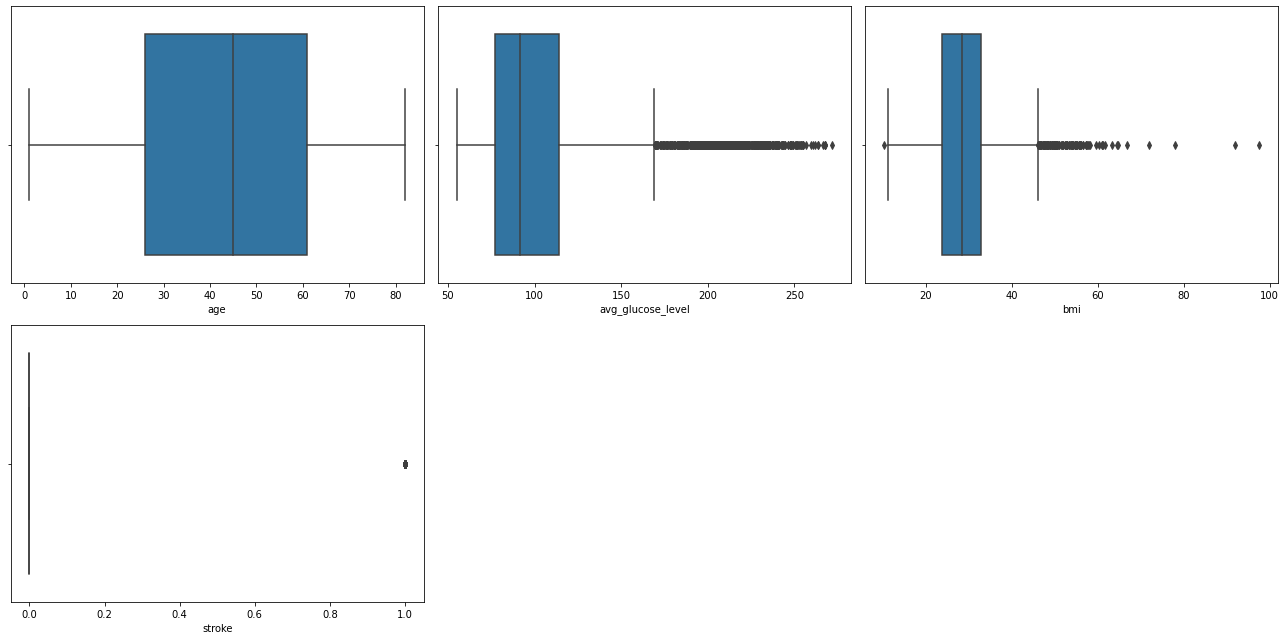

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax)

plt.tight_layout()

In [32]:
# Proses drop outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df[['age', 'avg_glucose_level', 'bmi']]<(Q1-1.5*IQR))|(df[['age', 'avg_glucose_level', 'bmi']]>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah outliers didrop
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


(4341, 9)

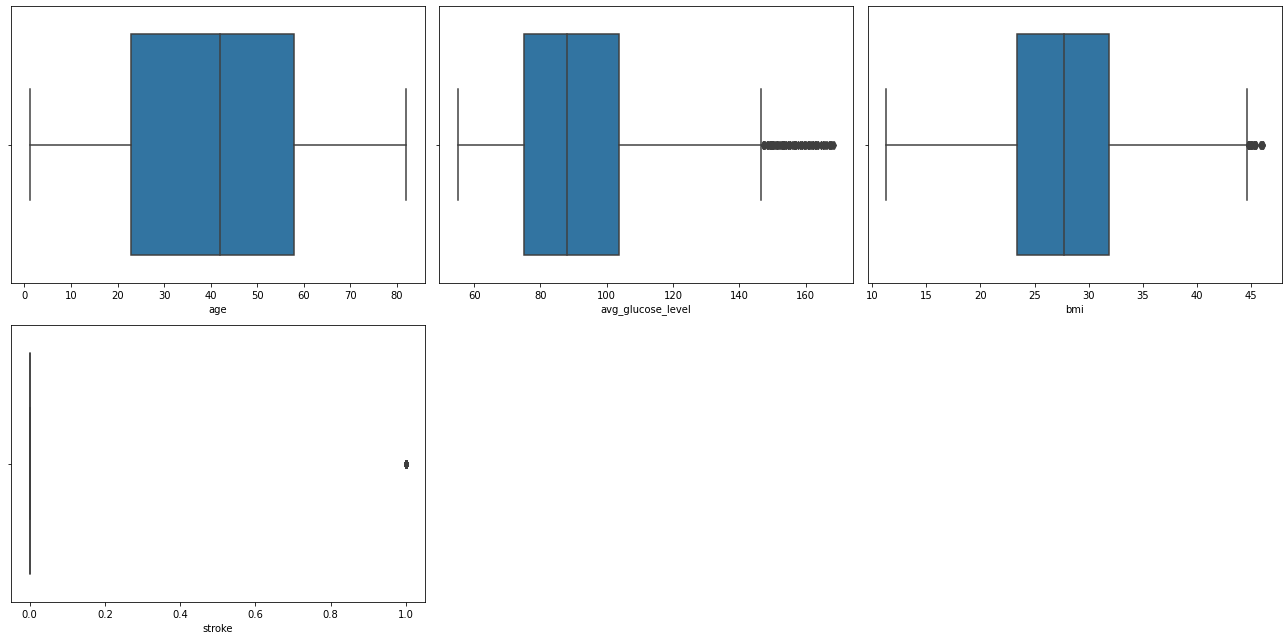

In [33]:
plt.figure(figsize=(18, 9))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax)

plt.tight_layout()

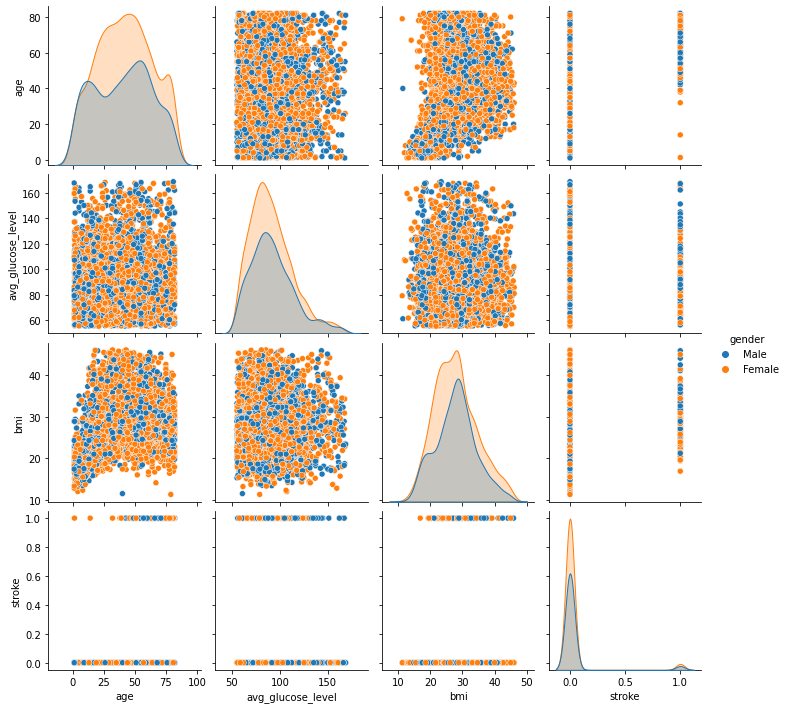

In [34]:
sns.pairplot(df, hue='gender')

In [35]:
kor = df.select_dtypes(include='number').corr().abs()

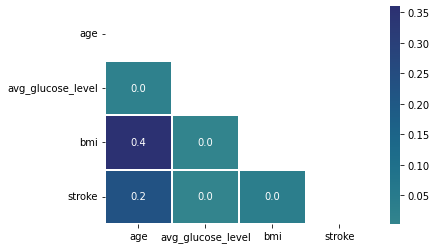

In [36]:
import numpy as np

cmap = sns.color_palette("crest", as_cmap=True)
mask = np.triu(np.ones_like(kor, dtype=bool))
sns.heatmap(kor, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt='.1f', center=0)

# Categorical

In [37]:
df.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Univariate

In [38]:
df.select_dtypes(exclude='number').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

**gender**

In [39]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

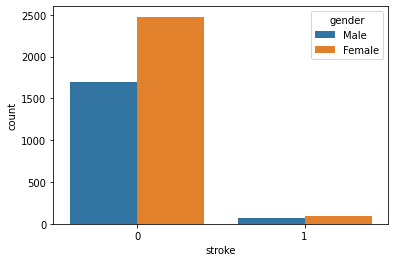

In [40]:
sns.countplot(data=df, x='stroke', hue='gender')

In [41]:
df['gender'].value_counts()

Female    2574
Male      1767
Name: gender, dtype: int64

**ever married**

In [42]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

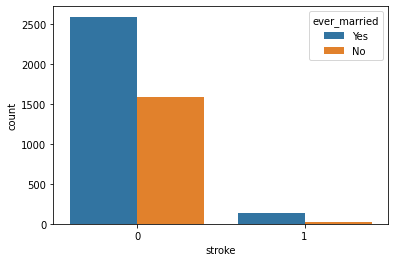

In [43]:
sns.countplot(data=df, x='stroke', hue='ever_married')

In [44]:
df = df.drop('ever_married', axis=1)

**work type**

In [45]:
df['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

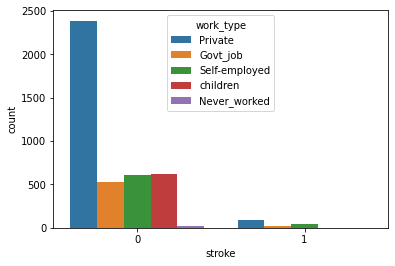

In [46]:
sns.countplot(data=df, x='stroke', hue='work_type')

In [47]:
df['work_type'].value_counts()

Private          2480
Self-employed     661
children          627
Govt_job          551
Never_worked       22
Name: work_type, dtype: int64

**residence type**

In [48]:
df['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

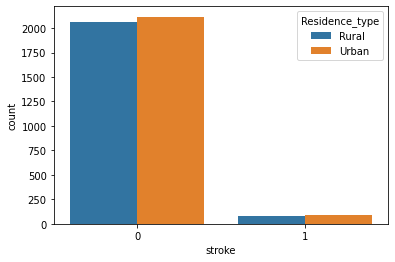

In [49]:
sns.countplot(data=df, x='stroke', hue='Residence_type')

In [50]:
df = df.drop('Residence_type', axis=1)

**smoking status**

In [51]:
df['smoking_status'].unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

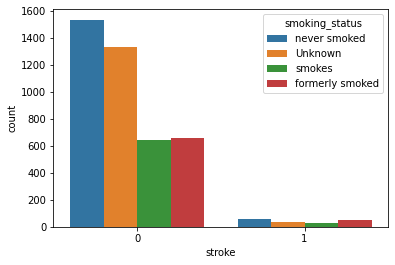

In [52]:
sns.countplot(data=df, x='stroke', hue='smoking_status')

In [53]:
df['smoking_status'].value_counts()

never smoked       1594
Unknown            1371
formerly smoked     707
smokes              669
Name: smoking_status, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

objlist = df.select_dtypes(exclude='number').columns

print(objlist)

Index(['gender', 'work_type', 'smoking_status'], dtype='object')


In [55]:
le = LabelEncoder()
for i in objlist:
    df[i] = le.fit_transform(df[i].astype(str))

In [56]:
df.head()

,gender,age,work_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,2,105.92,32.500000,2,1
6,1,74.0,2,70.09,27.400000,2,1
7,0,69.0,2,94.39,22.800000,2,1
8,0,59.0,2,76.15,28.893237,0,1
9,0,78.0,2,58.57,24.200000,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4341 entries, 2 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4341 non-null   int64  
 1   age                4341 non-null   float64
 2   work_type          4341 non-null   int64  
 3   avg_glucose_level  4341 non-null   float64
 4   bmi                4341 non-null   float64
 5   smoking_status     4341 non-null   int64  
 6   stroke             4341 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 400.4 KB


In [58]:
df.shape

(4341, 7)

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

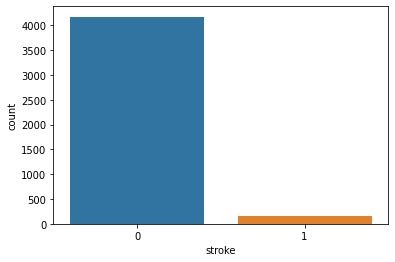

In [60]:
sns.countplot(data=df, x='stroke')

In [61]:
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [63]:
print(len(X_train))
print(len(X_test))

3472
869


In [64]:
from collections import Counter

In [65]:
from imblearn.over_sampling import RandomOverSampler

rdm = RandomOverSampler(random_state=42)
X_sm, y_sm = rdm.fit_resample(X_train, y_train)

In [66]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 3340, 1: 132})
Counter({0: 836, 1: 33})


In [67]:
print(Counter(y_sm))

Counter({0: 3340, 1: 3340})


In [68]:
std = StandardScaler()

In [69]:
X_train = std.fit_transform(X_sm)
X_test = std.transform(X_test)

In [70]:
from sklearn.pipeline import Pipeline

steps = [('dt', DecisionTreeClassifier(random_state=42))]

pipeline = Pipeline(steps)
parameters = {'dt__max_depth':np.arange(1,6),
              'dt__min_samples_leaf':[0.1, 0.2, 0.3, 0.4, 0.5],
              'dt__max_features': [None, 0.1, 0.2],
              'dt__criterion' : ['gini', 'entropy']
              }
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv = GridSearchCV(pipeline, param_grid=parameters, cv=kf, scoring='roc_auc')
cv.fit(X_train, y_sm)
print('best score = {}'.format(cv.best_score_))
print('best parameter= {}'.format(cv.best_params_))

best score = 0.8334297902715342
best parameter= {'dt__criterion': 'entropy', 'dt__max_depth': 4, 'dt__max_features': None, 'dt__min_samples_leaf': 0.1}


In [71]:
best_model = cv.best_estimator_
best_model

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=0.1,
                                        random_state=42))])

In [72]:
y_pred = best_model.predict(X_test)

In [73]:
print('acc: {}'.format(accuracy_score(y_test, y_pred)))
print('prec: {}'.format(precision_score(y_test, y_pred)))
print('rec: {}'.format(recall_score(y_test, y_pred)))
print('f1: {}'.format(f1_score(y_test, y_pred)))

acc: 0.6260069044879172
prec: 0.08522727272727272
rec: 0.9090909090909091
f1: 0.15584415584415584


In [74]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

In [75]:
cm

array([[514, 322],
       [  3,  30]])

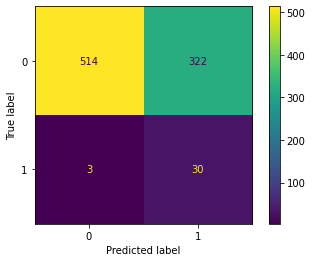

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76       836
           1       0.09      0.91      0.16        33

    accuracy                           0.63       869
   macro avg       0.54      0.76      0.46       869
weighted avg       0.96      0.63      0.74       869



In [78]:
y_pred_prob = best_model.predict_proba(X_test)[:,1]

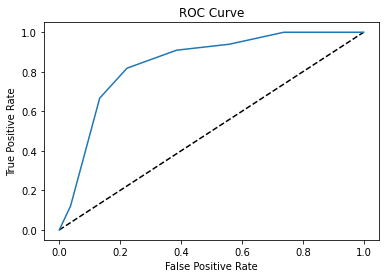

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [80]:
print(roc_auc_score(y_test, y_pred_prob))

0.8433014354066987
